In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
# generate a list of column names
new_columns = list(range(-80, 19))

In [3]:
data= pd.read_csv(r"D:\ten organism\train data\ussrey bac vs. shuffled ten.csv")
downstream= pd.read_csv(r"D:\downstream control\train organism\train_downstream_ussrey.csv")

In [4]:
data.isnull().values.any()

False

In [5]:
data.head(5)

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-6.78,-6.57,-10.51,-6.57,-10.51,-5.37,-5.37,-9.81,-8.26,-6.78,...,-9.81,-8.26,-9.69,-10.51,-5.37,-3.82,-6.78,-8.26,-9.81,1
1,-6.78,-9.81,-8.26,-6.57,-5.37,-5.37,-6.57,-9.81,-6.57,-5.37,...,-6.78,-9.81,-5.37,-10.51,-6.57,-10.51,-6.57,-5.37,-6.57,1
2,-3.82,-6.57,-5.37,-6.57,-10.51,-6.57,-9.81,-5.37,-5.37,-6.78,...,-9.69,-8.26,-9.81,-6.57,-6.57,-10.51,-5.37,-5.37,-6.57,1
3,-6.78,-14.59,-9.69,-8.26,-9.81,-5.37,-6.57,-5.37,-5.37,-3.82,...,-9.81,-6.57,-6.57,-6.57,-8.26,-9.81,-6.78,-14.59,-8.26,1
4,-3.82,-5.37,-6.57,-5.37,-9.81,-6.78,-5.37,-3.82,-10.51,-6.57,...,-9.69,-9.81,-5.37,-6.78,-9.81,-5.37,-5.37,-5.37,-5.37,1


In [6]:
downstream.head(5)

,150,151,152,153,154,155,156,157,158,159,...,239,240,241,242,243,244,245,246,247,248
0,-6.78,-10.51,-3.82,-6.57,-9.81,-6.57,-6.57,-5.37,-5.37,-3.82,...,-6.78,-14.59,-8.26,-9.69,-8.26,-8.26,-9.81,-5.37,-6.78,-10.51
1,-8.26,-9.81,-6.78,-9.81,-5.37,-6.78,-8.26,-9.81,-5.37,-10.51,...,-6.57,-14.59,-8.26,-9.69,-14.59,-6.57,-6.57,-3.82,-10.51,-9.69
2,-6.57,-8.26,-9.81,-5.37,-6.78,-9.81,-10.51,-6.57,-5.37,-10.51,...,-5.37,-5.37,-10.51,-6.57,-6.78,-14.59,-6.78,-5.37,-6.57,-9.81
3,-10.51,-6.57,-9.81,-5.37,-6.57,-5.37,-5.37,-6.57,-10.51,-5.37,...,-9.69,-14.59,-6.78,-6.57,-14.59,-6.78,-5.37,-5.37,-3.82,-5.37
4,-5.37,-5.37,-6.78,-9.81,-10.51,-9.69,-14.59,-6.78,-9.81,-6.78,...,-6.78,-9.81,-6.78,-6.57,-9.81,-6.57,-6.57,-9.81,-6.57,-3.82


### Preprocessing Promoter data

In [7]:
promoter_seq = data[data['label'] == 1]
promoter_seq.shape

(14669, 100)

In [8]:
promoter_no_label=promoter_seq.drop(columns=['label'])
promoter_no_label.columns=new_columns
promoter_no_label.shape

(14669, 99)

In [9]:
promoter_without_label=promoter_no_label
promoter_without_label.shape

(14669, 99)

In [10]:
promoter_without_label['label']=1

In [11]:
promoter= promoter_without_label
promoter['label']=promoter['label'].astype(int)
promoter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14669 entries, 0 to 14668
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   -80     14669 non-null  float64
 1   -79     14669 non-null  float64
 2   -78     14669 non-null  float64
 3   -77     14669 non-null  float64
 4   -76     14669 non-null  float64
 5   -75     14669 non-null  float64
 6   -74     14669 non-null  float64
 7   -73     14669 non-null  float64
 8   -72     14669 non-null  float64
 9   -71     14669 non-null  float64
 10  -70     14669 non-null  float64
 11  -69     14669 non-null  float64
 12  -68     14669 non-null  float64
 13  -67     14669 non-null  float64
 14  -66     14669 non-null  float64
 15  -65     14669 non-null  float64
 16  -64     14669 non-null  float64
 17  -63     14669 non-null  float64
 18  -62     14669 non-null  float64
 19  -61     14669 non-null  float64
 20  -60     14669 non-null  float64
 21  -59     14669 non-null  float64
 2

### Preprocessing Downstream Data

In [12]:
downstream

,150,151,152,153,154,155,156,157,158,159,...,239,240,241,242,243,244,245,246,247,248
0,-6.78,-10.51,-3.82,-6.57,-9.81,-6.57,-6.57,-5.37,-5.37,-3.82,...,-6.78,-14.59,-8.26,-9.69,-8.26,-8.26,-9.81,-5.37,-6.78,-10.51
1,-8.26,-9.81,-6.78,-9.81,-5.37,-6.78,-8.26,-9.81,-5.37,-10.51,...,-6.57,-14.59,-8.26,-9.69,-14.59,-6.57,-6.57,-3.82,-10.51,-9.69
2,-6.57,-8.26,-9.81,-5.37,-6.78,-9.81,-10.51,-6.57,-5.37,-10.51,...,-5.37,-5.37,-10.51,-6.57,-6.78,-14.59,-6.78,-5.37,-6.57,-9.81
3,-10.51,-6.57,-9.81,-5.37,-6.57,-5.37,-5.37,-6.57,-10.51,-5.37,...,-9.69,-14.59,-6.78,-6.57,-14.59,-6.78,-5.37,-5.37,-3.82,-5.37
4,-5.37,-5.37,-6.78,-9.81,-10.51,-9.69,-14.59,-6.78,-9.81,-6.78,...,-6.78,-9.81,-6.78,-6.57,-9.81,-6.57,-6.57,-9.81,-6.57,-3.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-6.57,-5.37,-6.57,-14.59,-6.78,-6.57,-8.26,-10.51,-5.37,-6.57,...,-6.78,-9.81,-6.78,-10.51,-5.37,-6.57,-14.59,-8.26,-8.26,-6.57
14665,-9.81,-5.37,-6.78,-10.51,-9.81,-6.57,-10.51,-8.26,-6.57,-6.78,...,-6.57,-5.37,-3.82,-10.51,-6.78,-9.81,-8.26,-6.78,-3.82,-10.51
14666,-5.37,-5.37,-5.37,-5.37,-6.57,-8.26,-14.59,-9.69,-10.51,-3.82,...,-5.37,-3.82,-6.78,-9.81,-10.51,-6.57,-6.78,-10.51,-5.37,-6.57
14667,-9.69,-9.81,-5.37,-6.57,-6.57,-8.26,-9.81,-5.37,-6.78,-9.81,...,-3.82,-6.57,-5.37,-5.37,-5.37,-5.37,-3.82,-10.51,-6.57,-10.51


In [13]:
downstream.columns= new_columns
downstream_no_label=downstream
downstream['label']= 0
downstream['label']= downstream['label'].astype(int)

In [14]:
downstream

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-6.78,-10.51,-3.82,-6.57,-9.81,-6.57,-6.57,-5.37,-5.37,-3.82,...,-14.59,-8.26,-9.69,-8.26,-8.26,-9.81,-5.37,-6.78,-10.51,0
1,-8.26,-9.81,-6.78,-9.81,-5.37,-6.78,-8.26,-9.81,-5.37,-10.51,...,-14.59,-8.26,-9.69,-14.59,-6.57,-6.57,-3.82,-10.51,-9.69,0
2,-6.57,-8.26,-9.81,-5.37,-6.78,-9.81,-10.51,-6.57,-5.37,-10.51,...,-5.37,-10.51,-6.57,-6.78,-14.59,-6.78,-5.37,-6.57,-9.81,0
3,-10.51,-6.57,-9.81,-5.37,-6.57,-5.37,-5.37,-6.57,-10.51,-5.37,...,-14.59,-6.78,-6.57,-14.59,-6.78,-5.37,-5.37,-3.82,-5.37,0
4,-5.37,-5.37,-6.78,-9.81,-10.51,-9.69,-14.59,-6.78,-9.81,-6.78,...,-9.81,-6.78,-6.57,-9.81,-6.57,-6.57,-9.81,-6.57,-3.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-6.57,-5.37,-6.57,-14.59,-6.78,-6.57,-8.26,-10.51,-5.37,-6.57,...,-9.81,-6.78,-10.51,-5.37,-6.57,-14.59,-8.26,-8.26,-6.57,0
14665,-9.81,-5.37,-6.78,-10.51,-9.81,-6.57,-10.51,-8.26,-6.57,-6.78,...,-5.37,-3.82,-10.51,-6.78,-9.81,-8.26,-6.78,-3.82,-10.51,0
14666,-5.37,-5.37,-5.37,-5.37,-6.57,-8.26,-14.59,-9.69,-10.51,-3.82,...,-3.82,-6.78,-9.81,-10.51,-6.57,-6.78,-10.51,-5.37,-6.57,0
14667,-9.69,-9.81,-5.37,-6.57,-6.57,-8.26,-9.81,-5.37,-6.78,-9.81,...,-6.57,-5.37,-5.37,-5.37,-5.37,-3.82,-10.51,-6.57,-10.51,0


### Plotting Graph

In [15]:
for_line= pd.DataFrame(promoter_no_label.mean())
downstream_line= pd.DataFrame(downstream_no_label.mean())

In [16]:
for_line.reset_index(drop=False, inplace=True)
for_line.drop(for_line.index[-1], inplace=True)
for_line['index']=for_line['index'].astype(int)

downstream_line.reset_index(drop=False, inplace=True)
downstream_line.drop(downstream_line.index[-1], inplace=True)

for_line

,index,0
0,-80,-8.101757
1,-79,-8.124299
2,-78,-8.163010
3,-77,-8.136524
4,-76,-8.138863
...,...,...
94,14,-7.983544
95,15,-8.022828
96,16,-8.046257
97,17,-8.025855


In [17]:
downstream_columns= list(range(150,249))
downstream_line['downstream position']= downstream_columns
downstream_line['index']=downstream_line['index'].astype(int)
downstream_line

,index,0,downstream position
0,-80,-8.376394,150
1,-79,-8.345650,151
2,-78,-8.354927,152
3,-77,-8.428811,153
4,-76,-8.355195,154
...,...,...,...
94,14,-8.425919,244
95,15,-8.373127,245
96,16,-8.427213,246
97,17,-8.438258,247


In [18]:
downstream_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                99 non-null     int32  
 1   0                    99 non-null     float64
 2   downstream position  99 non-null     int64  
dtypes: float64(1), int32(1), int64(1)
memory usage: 2.1 KB


In [19]:
for_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   99 non-null     int32  
 1   0       99 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 1.3 KB


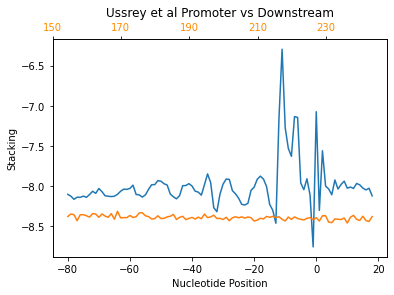

In [20]:
import matplotlib.ticker as ticker

# create the Seaborn line plots
plot = sns.lineplot(x='index', y=0, data=for_line)
plot = sns.lineplot(x='index', y=0, data=downstream_line)

# create a twin Axes object for the new x-axis
ax2 = plot.twiny()

# set the new x-axis tick positions and labels
ax2.set_xticks(downstream_line.index)
ax2.set_xticklabels(downstream_line['downstream position'], color='darkorange')

# set the gap between the tick labels
ax2.xaxis.set_major_locator(ticker.MultipleLocator(20))

# set the x-axis and y-axis labels and title
plot.set(xlabel="Nucleotide Position", ylabel="Stacking", title='Ussrey et al Promoter vs Downstream')

# show the plot
plt.show()


### Preparing Training Data

In [21]:
data= pd.concat([promoter,downstream])

In [22]:
data.reset_index(drop=True, inplace=True)

In [23]:
data

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-6.78,-6.57,-10.51,-6.57,-10.51,-5.37,-5.37,-9.81,-8.26,-6.78,...,-9.81,-8.26,-9.69,-10.51,-5.37,-3.82,-6.78,-8.26,-9.81,1
1,-6.78,-9.81,-8.26,-6.57,-5.37,-5.37,-6.57,-9.81,-6.57,-5.37,...,-6.78,-9.81,-5.37,-10.51,-6.57,-10.51,-6.57,-5.37,-6.57,1
2,-3.82,-6.57,-5.37,-6.57,-10.51,-6.57,-9.81,-5.37,-5.37,-6.78,...,-9.69,-8.26,-9.81,-6.57,-6.57,-10.51,-5.37,-5.37,-6.57,1
3,-6.78,-14.59,-9.69,-8.26,-9.81,-5.37,-6.57,-5.37,-5.37,-3.82,...,-9.81,-6.57,-6.57,-6.57,-8.26,-9.81,-6.78,-14.59,-8.26,1
4,-3.82,-5.37,-6.57,-5.37,-9.81,-6.78,-5.37,-3.82,-10.51,-6.57,...,-9.69,-9.81,-5.37,-6.78,-9.81,-5.37,-5.37,-5.37,-5.37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29333,-6.57,-5.37,-6.57,-14.59,-6.78,-6.57,-8.26,-10.51,-5.37,-6.57,...,-9.81,-6.78,-10.51,-5.37,-6.57,-14.59,-8.26,-8.26,-6.57,0
29334,-9.81,-5.37,-6.78,-10.51,-9.81,-6.57,-10.51,-8.26,-6.57,-6.78,...,-5.37,-3.82,-10.51,-6.78,-9.81,-8.26,-6.78,-3.82,-10.51,0
29335,-5.37,-5.37,-5.37,-5.37,-6.57,-8.26,-14.59,-9.69,-10.51,-3.82,...,-3.82,-6.78,-9.81,-10.51,-6.57,-6.78,-10.51,-5.37,-6.57,0
29336,-9.69,-9.81,-5.37,-6.57,-6.57,-8.26,-9.81,-5.37,-6.78,-9.81,...,-6.57,-5.37,-5.37,-5.37,-5.37,-3.82,-10.51,-6.57,-10.51,0


# Prediction using machine learning

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
from sklearn.model_selection import KFold
from statistics import mean
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score, matthews_corrcoef, confusion_matrix

In [25]:

X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109)

inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)





In [26]:
feature_list=list(X_train.columns)

In [27]:
#'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300

In [28]:
X.shape

(29338, 99)

## Model Training

In [29]:
kfold = KFold(n_splits=10, shuffle=True)
clf = RandomForestClassifier(max_depth=20,
                             max_features=None,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             n_estimators=300,
                             n_jobs=-1,
                             random_state=101)

fold_no = 1
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
mcc_list = []
specificity_list = []

for train, test in kfold.split(inputs, targets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=109)

    trainX, testX = inputs[train], inputs[test]
    trainY, testY = targets[train], targets[test]
    clf.fit(trainX, trainY)
    y_pred = clf.predict(testX)

    accuracy_list.append(accuracy_score(testY, y_pred))
    precision_list.append(precision_score(testY, y_pred))
    recall_list.append(recall_score(testY, y_pred))
    f1_score_list.append(f1_score(testY, y_pred))

    # Calculate MCC
    mcc = matthews_corrcoef(testY, y_pred)
    mcc_list.append(mcc)

    # Calculate specificity
    tn, fp, fn, tp = confusion_matrix(testY, y_pred).ravel()
    specificity = tn / (tn + fp)
    specificity_list.append(specificity)

    print("Fold {}: Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
        fold_no, accuracy_list[-1], precision_list[-1], recall_list[-1], f1_score_list[-1], mcc_list[-1], specificity_list[-1]))

    fold_no += 1

Fold 1: Accuracy: 0.8408316291751875, Precision: 0.8664710198092443, Recall: 0.805593451568895, F1 Score: 0.8349240014139271, MCC: 0.6833344105165302, Specificity: 0.8760217983651226
Fold 2: Accuracy: 0.8350374914792092, Precision: 0.8723088344469191, Recall: 0.7901815736381977, F1 Score: 0.8292166549047283, MCC: 0.6735096295562408, Specificity: 0.8811333794056669
Fold 3: Accuracy: 0.8490115882753919, Precision: 0.8838421444527178, Recall: 0.805291723202171, F1 Score: 0.8427405040823572, MCC: 0.7009429540885092, Specificity: 0.8931506849315068
Fold 4: Accuracy: 0.8476482617586912, Precision: 0.8712797619047619, Recall: 0.8103806228373702, F1 Score: 0.8397275008963786, MCC: 0.6965699291438826, Specificity: 0.8838146406984554
Fold 5: Accuracy: 0.8568507157464212, Precision: 0.8787878787878788, Recall: 0.8228373702422145, F1 Score: 0.849892780557541, MCC: 0.7147776514903849, Specificity: 0.8898589657488247
Fold 6: Accuracy: 0.8554873892297206, Precision: 0.8805275407292474, Recall: 0.8078

In [30]:
accuracy_list

[0.8408316291751875,
 0.8350374914792092,
 0.8490115882753919,
 0.8476482617586912,
 0.8568507157464212,
 0.8554873892297206,
 0.8531015678254942,
 0.8537832310838446,
 0.8595294919877259,
 0.8455506307534947]

In [31]:
precision_list

[0.8664710198092443,
 0.8723088344469191,
 0.8838421444527178,
 0.8712797619047619,
 0.8787878787878788,
 0.8805275407292474,
 0.8830409356725146,
 0.8988095238095238,
 0.9012435991221653,
 0.8947368421052632]

In [32]:
recall_list

[0.805593451568895,
 0.7901815736381977,
 0.805291723202171,
 0.8103806228373702,
 0.8228373702422145,
 0.8078291814946619,
 0.8167680865449628,
 0.8047968021319121,
 0.8164347249834327,
 0.7812071330589849]

In [33]:
specificity_list

[0.8760217983651226,
 0.8811333794056669,
 0.8931506849315068,
 0.8838146406984554,
 0.8898589657488247,
 0.8992805755395683,
 0.8900343642611683,
 0.9050942079553385,
 0.9051966292134831,
 0.9091525423728813]

In [34]:
f1_score_list 

[0.8349240014139271,
 0.8292166549047283,
 0.8427405040823572,
 0.8397275008963786,
 0.849892780557541,
 0.8426132145508537,
 0.848612574639972,
 0.8492091388400704,
 0.8567454798331015,
 0.8341266935188575]

In [35]:
mcc_list

[0.6833344105165302,
 0.6735096295562408,
 0.7009429540885092,
 0.6965699291438826,
 0.7147776514903849,
 0.7117366418578932,
 0.7083937206215166,
 0.7122081206013019,
 0.7229942993961564,
 0.6964371701880151]

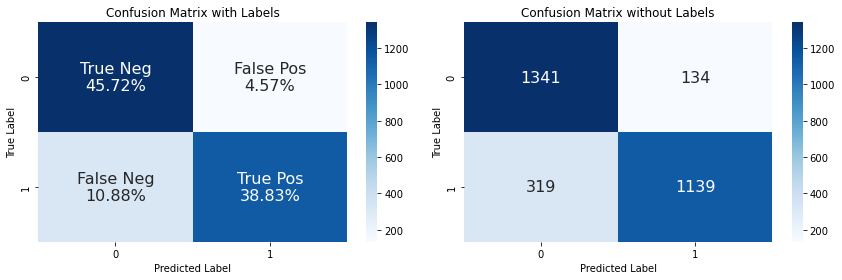

In [36]:
from sklearn.metrics import confusion_matrix
train_cm= confusion_matrix(testY, y_pred)

# Define labels for the four quadrants of the confusion matrix
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape confusion matrix into a 1D array for plotting
train_cm_array = train_cm.ravel()

# Compute percentage values for each quadrant
percentages = ['{0:.2%}'.format(value) for value in train_cm_array / np.sum(train_cm_array)]

# Combine labels and percentages into a list of strings for plotting
labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels, percentages)]

# Reshape labels into a 2D array for plotting
labels = np.asarray(labels).reshape(2,2)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot with labels
#sns.set(font_scale=1.4, ax=axes[0])
sns.heatmap(train_cm, annot=labels, annot_kws={"size": 16}, cmap='Blues', fmt='', ax=axes[0])
axes[0].set_title('Confusion Matrix with Labels')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot without labels
#sns.set(font_scale=1.4, ax=axes[1])
sns.heatmap(train_cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix without Labels')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


In [37]:
print(mean(accuracy_list))

0.8496831997315181


C:\Users\Subhojit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


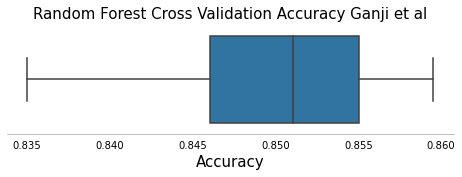

In [38]:
# Create a new figure with a larger size
plt.figure(figsize=(8,2))

# Create the boxplot with a custom title and color
ax = sns.boxplot(np.array(accuracy_list))
#sns.set(style='white')
#sns.set_palette('default')
plt.title('Random Forest Cross Validation Accuracy Ganji et al', fontsize=15)  # Set font size of title
plt.xlabel('Accuracy', fontsize=15)  # Set font size of x-label

# Remove top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Remove left and bottom ticks
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

# Remove left and bottom spines and set their color to gray
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(0.5)

# Display the plot
plt.show()


## Feature Importance

In [39]:
clf.feature_importances_

array([0.00417703, 0.00417076, 0.0041939 , 0.00398556, 0.00398066,
       0.00427517, 0.00356422, 0.00381458, 0.00429554, 0.00397923,
       0.00365873, 0.00362156, 0.00424241, 0.00390742, 0.00401673,
       0.0038832 , 0.00417992, 0.00413019, 0.00401316, 0.00390645,
       0.00409589, 0.00395346, 0.00372891, 0.00416437, 0.00381747,
       0.00408409, 0.00361917, 0.00395281, 0.00436074, 0.00366741,
       0.00396119, 0.00425816, 0.0038118 , 0.00410224, 0.00415089,
       0.00414744, 0.00466055, 0.00421112, 0.00403084, 0.00393482,
       0.00458455, 0.00404196, 0.00378587, 0.0039162 , 0.00398294,
       0.00458639, 0.00404954, 0.00496752, 0.00509223, 0.00439909,
       0.00428291, 0.00421752, 0.00458174, 0.00457294, 0.00472584,
       0.00452878, 0.00494969, 0.00511126, 0.00507008, 0.0047212 ,
       0.00503086, 0.00422641, 0.00510053, 0.00485386, 0.00442279,
       0.00540565, 0.00705536, 0.02454107, 0.15408769, 0.20303389,
       0.04656751, 0.01818821, 0.02130967, 0.0503141 , 0.02421

In [40]:
clf.feature_importances_.shape

(99,)

In [41]:
X_train.columns

Index([-80, -79, -78, -77, -76, -75, -74, -73, -72, -71, -70, -69, -68, -67,
       -66, -65, -64, -63, -62, -61, -60, -59, -58, -57, -56, -55, -54, -53,
       -52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39,
       -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25,
       -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11,
       -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,
         4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18],
      dtype='object')

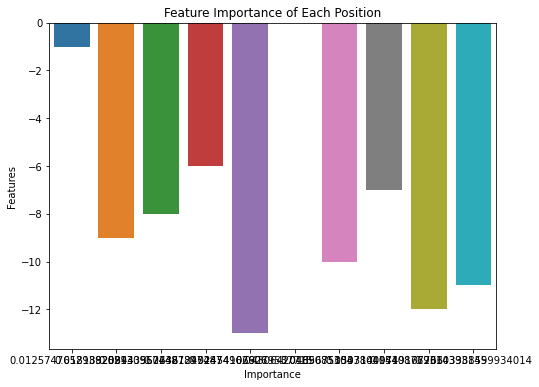

In [42]:
imp_df= pd.DataFrame({
    "Features": X_train.columns,
    "Importance": clf.feature_importances_
})

fi= imp_df.sort_values(by="Importance",ascending=False)

fi2=fi.head(10)
plt.figure(figsize=(8,6))
sns.barplot(data=fi2, x="Importance", y="Features")
plt.title('Feature Importance of Each Position')
plt.show()

In [43]:
feature_importance= pd.DataFrame(clf.feature_importances_)
feature_importance.reset_index(drop=False, inplace=True)
feature_importance['indice']= new_columns
feature_importance

,index,0,indice
0,0,0.004177,-80
1,1,0.004171,-79
2,2,0.004194,-78
3,3,0.003986,-77
4,4,0.003981,-76
...,...,...,...
94,94,0.003800,14
95,95,0.004043,15
96,96,0.004391,16
97,97,0.003834,17


[Text(0.5, 0, 'features'),
 Text(0, 0.5, 'importance'),
 Text(0.5, 1.0, 'feature importance')]

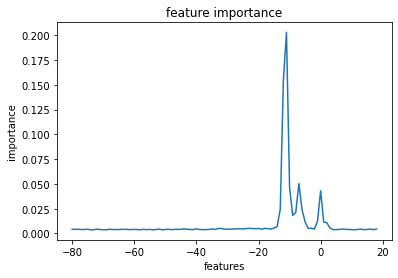

In [44]:
plot= sns.lineplot(x='indice', y=0, data=feature_importance)
plot.set(xlabel ="features", ylabel = "importance", title ='feature importance')

In [45]:
print("Accuracy:",metrics.accuracy_score(testY, y_pred))
print("Precision:",metrics.precision_score(testY, y_pred))
print("Recall:",metrics.recall_score(testY, y_pred))
print("f1_score:",metrics.f1_score(testY, y_pred))

Accuracy: 0.8455506307534947
Precision: 0.8947368421052632
Recall: 0.7812071330589849
f1_score: 0.8341266935188575


C:\Users\Subhojit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


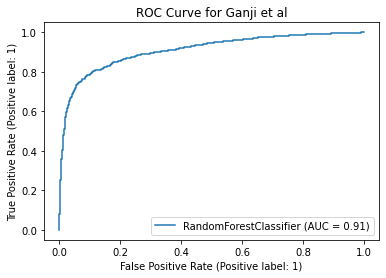

In [46]:
roc_curve= metrics.plot_roc_curve(clf, testX, testY)
roc_curve.ax_.set_title("ROC Curve for Ganji et al")
plt.show()

C:\Users\Subhojit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


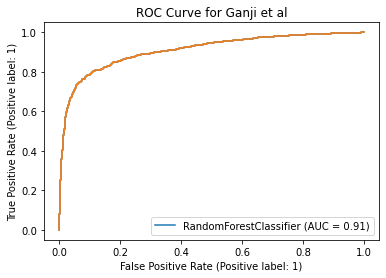

In [47]:
import pandas as pd

# Assuming roc_curve is the object returned by metrics.plot_roc_curve
roc_curve = metrics.plot_roc_curve(clf, testX, testY)

# Extract the data points from roc_curve
fpr = roc_curve.fpr
tpr = roc_curve.tpr

# Create a DataFrame
roc_df = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})

roc_df.to_csv('d:/ROC Curve data/downstream_ussrey_rf_roc_df.csv', index=False)

# Plot the ROC curve from the DataFrame
plt.plot(roc_df['False Positive Rate'], roc_df['True Positive Rate'])
plt.title("ROC Curve for Ganji et al")
plt.show()


# Using Shapley

In [104]:
!pip install shap

In [105]:
import shap


In [106]:
promoter.shape

(14669, 100)

### X_PCA promotor

In [107]:
import random

# set the random seed to ensure reproducibility
#random.seed(123)

# generate 40 random numbers between 1 to 15000
random_numbers = [random.randint(1, 10000) for _ in range(40)]

# print the random numbers
print(random_numbers)


[2184, 2005, 55, 8915, 2344, 4979, 7033, 7479, 2014, 644, 2136, 4409, 8613, 76, 2655, 729, 9662, 3850, 1174, 3616, 8276, 3786, 7366, 1861, 8252, 213, 7807, 3765, 3367, 3663, 9526, 2839, 9570, 7934, 9147, 2454, 9207, 5661, 942, 7654]


In [108]:
X_PCA_promoters = X.loc[[8499, 6345, 8807, 5017, 2395, 4771, 6378, 6038, 2073, 8765, 
                         5534, 8473, 1959, 2733, 9656, 6329, 7081, 1017, 2229, 7451, 338, 5727, 7369, 7392, 4978, 7029, 463, 2599, 8546, 
                         5323, 8468, 8434, 9119, 2251, 5630, 8195, 1717, 8937, 6046, 3685]]

In [109]:
X_PCA_promoters

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,9,10,11,12,13,14,15,16,17,18
8499,-6.57,-9.81,-8.26,-6.57,-10.51,-6.57,-6.78,-14.59,-6.78,-9.81,...,-14.59,-9.69,-14.59,-8.26,-9.69,-8.26,-9.81,-10.51,-9.69,-14.59
6345,-10.51,-6.57,-10.51,-6.57,-8.26,-14.59,-9.69,-9.81,-6.57,-9.81,...,-6.57,-5.37,-6.78,-9.81,-6.78,-10.51,-6.57,-8.26,-9.81,-6.78
8807,-6.57,-8.26,-14.59,-9.69,-14.59,-6.78,-6.57,-8.26,-9.81,-6.78,...,-5.37,-6.57,-8.26,-14.59,-9.69,-9.81,-6.57,-5.37,-5.37,-9.81
5017,-10.51,-6.57,-6.57,-6.57,-10.51,-5.37,-5.37,-6.57,-10.51,-3.82,...,-10.51,-8.26,-9.69,-9.81,-10.51,-8.26,-9.69,-10.51,-5.37,-9.81
2395,-6.57,-6.78,-9.81,-6.78,-10.51,-9.81,-6.57,-6.78,-8.26,-8.26,...,-6.57,-5.37,-3.82,-6.57,-5.37,-9.81,-6.78,-5.37,-5.37,-5.37
4771,-6.78,-10.51,-6.57,-9.81,-10.51,-6.78,-5.37,-6.57,-8.26,-14.59,...,-9.81,-8.26,-8.26,-6.57,-10.51,-9.69,-9.81,-6.57,-6.57,-14.59
6378,-9.81,-6.78,-8.26,-14.59,-6.57,-10.51,-6.57,-5.37,-6.57,-3.82,...,-8.26,-14.59,-6.57,-5.37,-10.51,-6.78,-3.82,-5.37,-6.57,-6.57
6038,-6.78,-3.82,-6.57,-9.81,-6.78,-3.82,-10.51,-6.78,-3.82,-6.57,...,-3.82,-6.57,-5.37,-9.81,-6.78,-9.81,-9.69,-9.81,-6.57,-3.82
2073,-9.69,-10.51,-3.82,-6.78,-14.59,-6.57,-6.78,-14.59,-6.57,-10.51,...,-6.57,-9.81,-6.57,-5.37,-6.57,-5.37,-5.37,-3.82,-6.57,-9.81
8765,-6.57,-5.37,-6.57,-3.82,-10.51,-8.26,-6.57,-6.57,-9.81,-8.26,...,-6.57,-6.57,-14.59,-8.26,-6.78,-5.37,-9.81,-6.78,-3.82,-6.57


In [110]:
explainer = shap.KernelExplainer(clf.predict, X_PCA_promoters)
shap_values = explainer.shap_values(X_PCA_promoters)

  0%|          | 0/40 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

In [111]:
shap_file = pd.DataFrame(shap_values)
shap_train_csv_file = 'shap_train.csv'

with open(shap_train_csv_file, mode='w') as f:
    shap_file.to_csv(f)

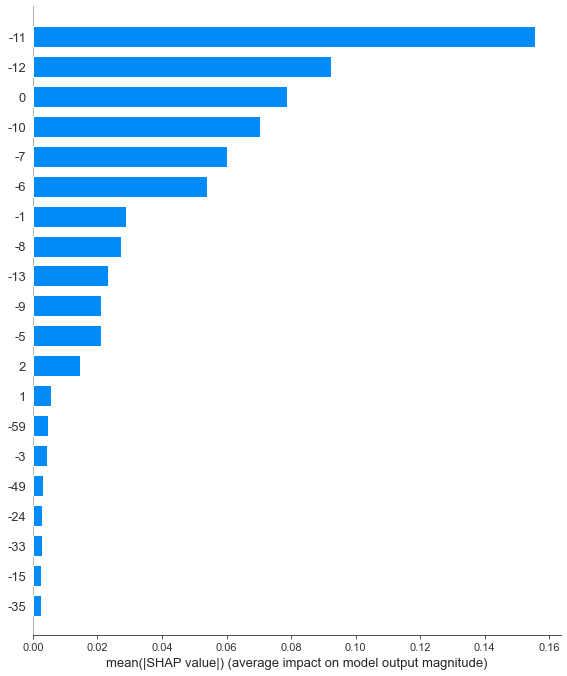

In [112]:
shap.summary_plot(shap_values,X_PCA_promoters, plot_type="bar", feature_names = X_PCA_promoters.columns)

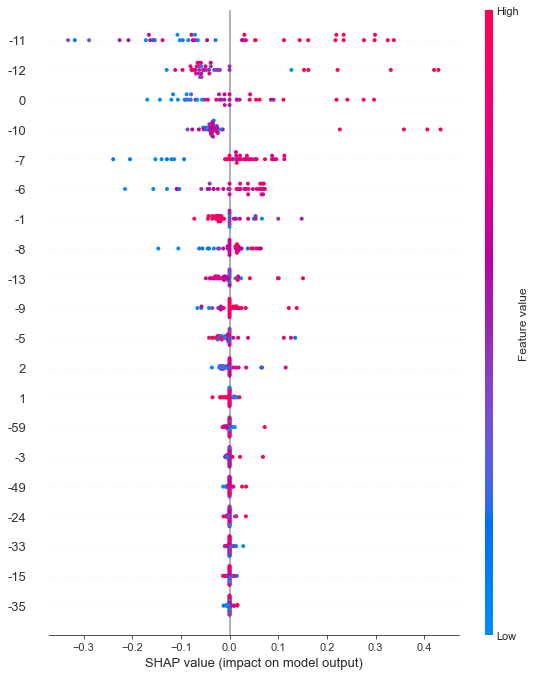

In [113]:
shap.summary_plot(shap_values, X_PCA_promoters, feature_names = X_PCA_promoters.columns)

AttributeError: 'int' object has no attribute 'split'

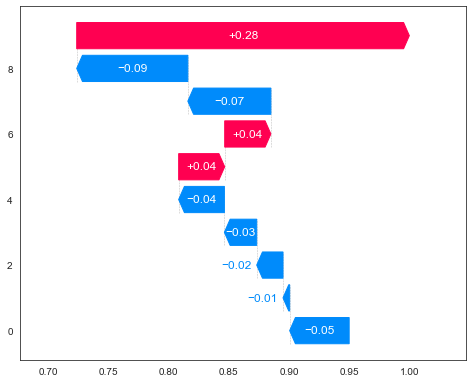

In [114]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[4], feature_names = X_PCA_promoters.columns)

In [ ]:
shap.initjs()
shap.plots.force(explainer.expected_value, shap_values, feature_names = X_PCA_promoters.columns)

In [ ]:
shap.initjs()
shap.plots.force(explainer.expected_value,shap_values[0], feature_names = X_PCA_promoters.columns)

# Test Organism Predictions

## Test Data

In [48]:
# Load the Test organisms dataset into a DataFrame
klebsiella = pd.read_csv(r"D:\ten organism\ussrey\test organism\stability_Sequences_80-20_sequences Klebsiella pneumoniae_output.csv")
salmonella= pd.read_csv(r"D:\ten organism\ussrey\test organism\stability_Sequences_80-20_sequences Salmonella enterica_output.csv")
klebsiella_downstream= pd.read_csv(r"D:\downstream control\ussrey\result\test organism\stability_Klebsiella pneumoniae_output.csv")
salmonella_downstream= pd.read_csv(r"D:\downstream control\ussrey\result\test organism\stability_Salmonella enterica_output.csv")

# Remove any irrelevant columns
test_organism = pd.concat([klebsiella,salmonella])
test_organism.columns=new_columns
test_organism.reset_index(drop=True, inplace=True)

test_organism_downstream= pd.concat([klebsiella_downstream,salmonella_downstream])
test_organism_downstream.columns=new_columns
test_organism_downstream.reset_index(drop=True, inplace=True)

test_without_labels= pd.concat([test_organism, test_organism_downstream])


In [49]:
test_line= pd.DataFrame(test_organism.mean())
test_line.reset_index(drop=False, inplace=True)
downstream_test_line=pd.DataFrame(test_organism_downstream.mean())
downstream_test_line.reset_index(drop= False, inplace=True)



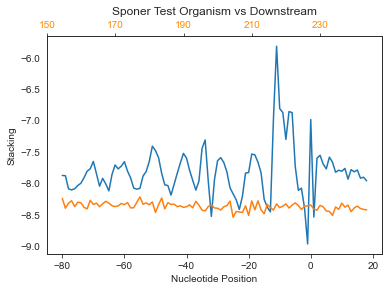

In [50]:
import matplotlib.ticker as ticker

sns.set_style('white')
# create the Seaborn line plots
plot = sns.lineplot(x='index', y=0, data=test_line)
plot = sns.lineplot(x='index', y=0, data=downstream_test_line)

# create a twin Axes object for the new x-axis
ax2 = plot.twiny()

# set the new x-axis tick positions and labels
ax2.set_xticks(downstream_line.index)
ax2.set_xticklabels(downstream_line['downstream position'], color='darkorange')

# set the gap between the tick labels
ax2.xaxis.set_major_locator(ticker.MultipleLocator(20))

# set the x-axis and y-axis labels and title
plot.set(xlabel="Nucleotide Position", ylabel="Stacking", title='Sponer Test Organism vs Downstream')

# show the plot
plt.show()


## Test Labels

In [51]:
test_organism_lables= np.ones(test_organism.shape[0], dtype=int)
test_downstream_labels= np.zeros(test_organism_downstream.shape[0], dtype=int)

test_labels = np.concatenate((test_organism_lables, test_downstream_labels))

In [52]:
test_without_labels.shape

(4620, 99)

## Test Prediction in One Go

In [53]:
# Create an array of ones with the same number of rows as the new dataset
#true_labels = np.ones(test_organism.shape[0], dtype=int)

# Make predictions on the new data
test_organism_pred = clf.predict(test_without_labels)

# Calculate the accuracy of the model on the new data
accuracy = metrics.accuracy_score(test_labels, test_organism_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8941558441558441


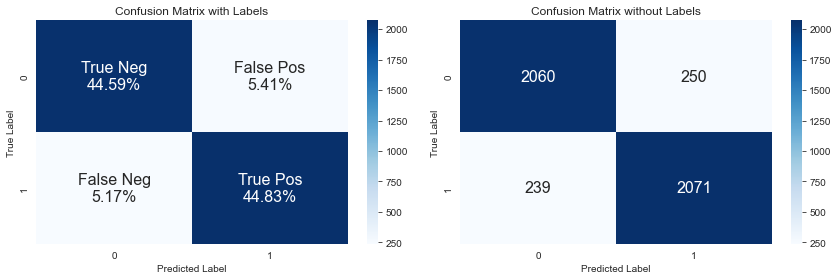

In [54]:
# Compute confusion matrix
cm = confusion_matrix(test_labels, test_organism_pred)

# Define labels for the four quadrants of the confusion matrix
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape confusion matrix into a 1D array for plotting
cm_array = cm.ravel()

# Compute percentage values for each quadrant
percentages = ['{0:.2%}'.format(value) for value in cm_array / np.sum(cm_array)]

# Combine labels and percentages into a list of strings for plotting
labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels, percentages)]

# Reshape labels into a 2D array for plotting
labels = np.asarray(labels).reshape(2,2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot with labels
#sns.set(font_scale=1.4, ax=axes[0])
sns.heatmap(cm, annot=labels, annot_kws={"size": 16}, cmap='Blues', fmt='', ax=axes[0])
axes[0].set_title('Confusion Matrix with Labels')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot without labels
#sns.set(font_scale=1.4, ax=axes[1])
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix without Labels')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


## Test Prediction in 10 splits

In [55]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score

In [56]:
# Convert DataFrame to numpy array
if isinstance(test_without_labels, pd.DataFrame):
    test_without_labels = test_without_labels.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

test_accuracy = []
test_precision = []
test_recall = []
test_f1_score = []
test_mcc = []
test_specificity = []
all_cms = []

# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(test_without_labels, test_labels)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = test_without_labels[test_index]
    y_test = test_labels[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    test_accuracy.append(accuracy)
    test_precision.append(precision)
    test_recall.append(recall)
    test_f1_score.append(f1)
    
    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    all_cms.append(cm)
    
    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    test_mcc.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    test_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
        test_accuracy[-1], test_precision[-1], test_recall[-1], test_f1_score[-1], test_mcc[-1], test_specificity[-1]))

Fold 1/10
 Accuracy: 0.8939393939393939, Precision: 0.9026548672566371, Recall: 0.8831168831168831, F1 Score: 0.8927789934354485, MCC: 0.7880634161047002, Specificity: 0.9047619047619048
Fold 2/10
 Accuracy: 0.8874458874458875, Precision: 0.8713692946058091, Recall: 0.9090909090909091, F1 Score: 0.8898305084745762, MCC: 0.7756188813975914, Specificity: 0.8658008658008658
Fold 3/10
 Accuracy: 0.8593073593073594, Precision: 0.8547008547008547, Recall: 0.8658008658008658, F1 Score: 0.8602150537634409, MCC: 0.7186753279614814, Specificity: 0.8528138528138528
Fold 4/10
 Accuracy: 0.9047619047619048, Precision: 0.9047619047619048, Recall: 0.9047619047619048, F1 Score: 0.9047619047619048, MCC: 0.8095238095238095, Specificity: 0.9047619047619048
Fold 5/10
 Accuracy: 0.9177489177489178, Precision: 0.9106382978723404, Recall: 0.9264069264069265, F1 Score: 0.9184549356223175, MCC: 0.835623123370552, Specificity: 0.9090909090909091
Fold 6/10
 Accuracy: 0.8896103896103896, Precision: 0.878151260504

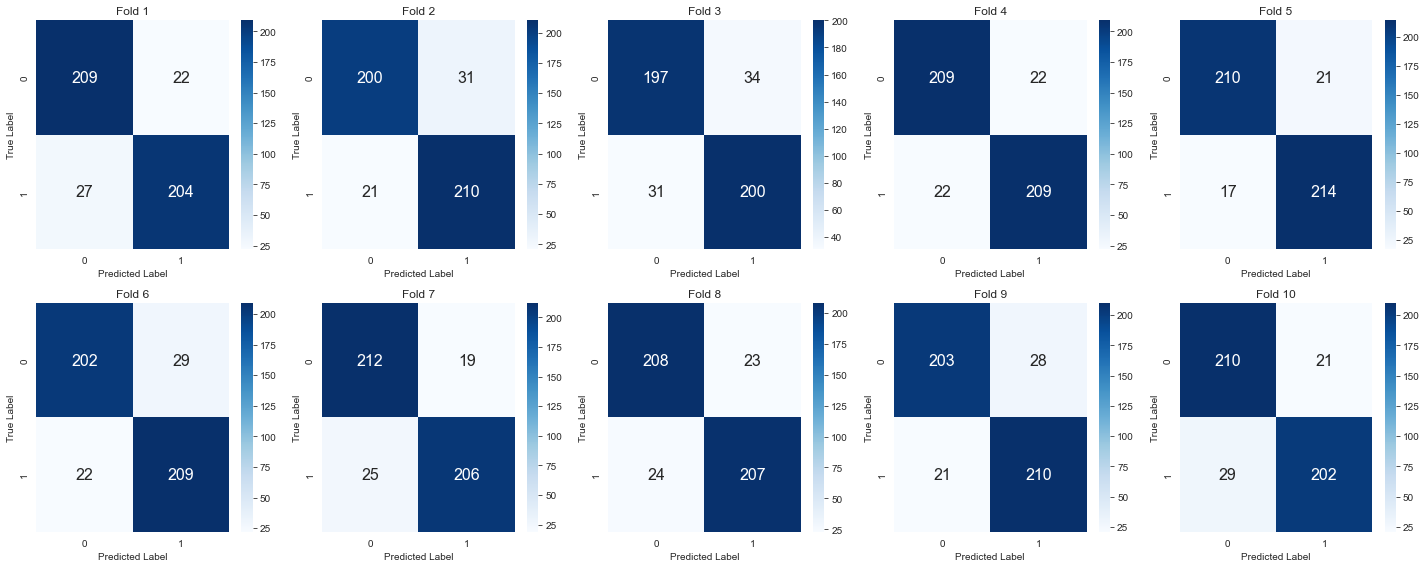

In [57]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i, ax in enumerate(axs.flatten()):
    if i < len(all_cms):
        cm = all_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


In [58]:
test_accuracy

[0.8939393939393939,
 0.8874458874458875,
 0.8593073593073594,
 0.9047619047619048,
 0.9177489177489178,
 0.8896103896103896,
 0.9047619047619048,
 0.8982683982683982,
 0.8939393939393939,
 0.8917748917748918]

In [59]:
test_precision

[0.9026548672566371,
 0.8713692946058091,
 0.8547008547008547,
 0.9047619047619048,
 0.9106382978723404,
 0.8781512605042017,
 0.9155555555555556,
 0.9,
 0.8823529411764706,
 0.905829596412556]

- Precision equal to 1.0 means that all the positive predictions made by the classifier are correct. 
- In other words, the classifier didn't make any false positive predictions. 

In [60]:
test_recall

[0.8831168831168831,
 0.9090909090909091,
 0.8658008658008658,
 0.9047619047619048,
 0.9264069264069265,
 0.9047619047619048,
 0.8917748917748918,
 0.8961038961038961,
 0.9090909090909091,
 0.8744588744588745]

In [61]:
test_specificity

[0.9047619047619048,
 0.8658008658008658,
 0.8528138528138528,
 0.9047619047619048,
 0.9090909090909091,
 0.8744588744588745,
 0.9177489177489178,
 0.9004329004329005,
 0.8787878787878788,
 0.9090909090909091]

In [62]:
test_f1_score

[0.8927789934354485,
 0.8898305084745762,
 0.8602150537634409,
 0.9047619047619048,
 0.9184549356223175,
 0.8912579957356077,
 0.9035087719298246,
 0.8980477223427332,
 0.8955223880597014,
 0.8898678414096917]

In [63]:
test_mcc

[0.7880634161047002,
 0.7756188813975914,
 0.7186753279614814,
 0.8095238095238095,
 0.835623123370552,
 0.7795787947596418,
 0.8097970204021665,
 0.7965442603023951,
 0.7882407813680822,
 0.784020092767634]

## Antisense Promoters with Downstream

###### Bacteria Names
- Chlamydia pneumoniae
- Corynebacterium glutamicum
- Helicobactor pylori
- Mycobacterium tuberculosis
- Nostoc sp
- Pseudomonas aeruginosa
- Salmonella enterica
- Streptomyces coelicolor
- Synechocystis sp

In [64]:
antisense= pd.read_csv(r"D:\Other promoters\Downstream sequences\Antisense\Antisense promoter vs downstream\Antisense ussrey promoter vs downstream.csv")
antisense

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-3.82,-6.78,-8.26,-9.81,-6.57,-5.37,-9.81,-6.78,-5.37,-5.37,...,-8.26,-6.57,-5.37,-5.37,-5.37,-6.78,-9.81,-5.37,-6.78,1
1,-9.81,-5.37,-6.78,-14.59,-9.69,-9.81,-6.57,-3.82,-5.37,-6.78,...,-5.37,-6.78,-14.59,-6.57,-6.57,-9.81,-8.26,-6.57,-5.37,1
2,-5.37,-9.81,-6.57,-6.57,-6.57,-9.81,-6.57,-3.82,-6.57,-3.82,...,-6.78,-14.59,-6.78,-9.81,-9.69,-10.51,-3.82,-5.37,-5.37,1
3,-9.81,-6.78,-3.82,-6.78,-9.81,-5.37,-6.78,-14.59,-6.78,-6.57,...,-6.57,-8.26,-9.81,-6.78,-9.81,-5.37,-5.37,-6.57,-6.57,1
4,-6.78,-8.26,-10.51,-3.82,-5.37,-5.37,-6.57,-3.82,-10.51,-8.26,...,-6.57,-6.78,-8.26,-14.59,-8.26,-8.26,-6.78,-9.81,-6.78,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12163,-9.69,-10.51,-5.37,-5.37,-9.81,-8.26,-8.26,-8.26,-6.78,-5.37,...,-5.37,-9.81,-6.57,-6.57,-9.81,-9.69,-10.51,-9.81,-8.26,0
12164,-5.37,-9.81,-6.78,-5.37,-9.81,-9.69,-8.26,-10.51,-6.57,-14.59,...,-10.51,-8.26,-9.69,-8.26,-9.81,-6.78,-14.59,-9.69,-9.81,0
12165,-6.78,-6.57,-9.81,-6.57,-6.57,-8.26,-8.26,-8.26,-9.81,-6.78,...,-10.51,-6.78,-3.82,-5.37,-10.51,-6.57,-6.78,-14.59,-8.26,0
12166,-5.37,-6.78,-9.81,-6.57,-5.37,-6.57,-14.59,-9.69,-8.26,-8.26,...,-8.26,-8.26,-9.81,-10.51,-6.78,-5.37,-5.37,-3.82,-6.78,0


In [65]:
antisense_promoter= antisense.drop(columns=['label'])
antisense_label= antisense['label']

In [66]:
# Convert DataFrame to numpy array
if isinstance(antisense_promoter, pd.DataFrame):
    antisense_promoter = antisense_promoter.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

antisense_accuracy = []
antisense_precision=[]
antisense_recall=[]
antisense_f1_score=[]
antisense_cms = []
antisense_mcc = []
antisense_specificity = []

# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(antisense_promoter, antisense_label)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = antisense_promoter[test_index]
    y_test = antisense_label[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    antisense_accuracy.append(accuracy)
    antisense_precision.append(precision)
    antisense_recall.append(recall)
    antisense_f1_score.append(f1)
    
    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    antisense_mcc.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    antisense_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
    antisense_accuracy[-1], antisense_precision[-1], antisense_recall[-1], antisense_f1_score[-1],
    antisense_mcc[-1], antisense_specificity[-1]))

    #fold_no += 1

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    antisense_cms.append(cm)


Fold 1/10
 Accuracy: 0.8060805258833197, Precision: 0.827768014059754, Recall: 0.7733990147783252, F1 Score: 0.799660441426146, MCC: 0.6135085606659197, Specificity: 0.9090909090909091
Fold 2/10
 Accuracy: 0.7929334428923582, Precision: 0.8, Recall: 0.7816091954022989, F1 Score: 0.7906976744186047, MCC: 0.5860295546091806, Specificity: 0.8388157894736842
Fold 3/10
 Accuracy: 0.8126540673788003, Precision: 0.8223350253807107, Recall: 0.7980295566502463, F1 Score: 0.8099999999999999, MCC: 0.6255907418517838, Specificity: 0.8042763157894737
Fold 4/10
 Accuracy: 0.8208709942481512, Precision: 0.8285714285714286, Recall: 0.8095238095238095, F1 Score: 0.818936877076412, MCC: 0.6419184322801603, Specificity: 0.8273026315789473
Fold 5/10
 Accuracy: 0.8167625308134757, Precision: 0.82793867120954, Recall: 0.7993421052631579, F1 Score: 0.8133891213389121, MCC: 0.6338920435966623, Specificity: 0.8322368421052632
Fold 6/10
 Accuracy: 0.8241577649958916, Precision: 0.8218954248366013, Recall: 0.827

In [67]:
antisense_accuracy

[0.8060805258833197,
 0.7929334428923582,
 0.8126540673788003,
 0.8208709942481512,
 0.8167625308134757,
 0.8241577649958916,
 0.8348397699260477,
 0.8208709942481512,
 0.8092105263157895,
 0.8166118421052632]

In [68]:
antisense_precision

[0.827768014059754,
 0.8,
 0.8223350253807107,
 0.8285714285714286,
 0.82793867120954,
 0.8218954248366013,
 0.8397328881469115,
 0.8145161290322581,
 0.8175675675675675,
 0.8235294117647058]

In [69]:
antisense_recall

[0.7733990147783252,
 0.7816091954022989,
 0.7980295566502463,
 0.8095238095238095,
 0.7993421052631579,
 0.8273026315789473,
 0.8273026315789473,
 0.8305921052631579,
 0.7960526315789473,
 0.805921052631579]

In [70]:
antisense_specificity

[0.9090909090909091,
 0.8388157894736842,
 0.8042763157894737,
 0.8273026315789473,
 0.8322368421052632,
 0.8341543513957307,
 0.8210180623973727,
 0.8423645320197044,
 0.8111658456486043,
 0.8223684210526315]

In [71]:
antisense_f1_score

[0.799660441426146,
 0.7906976744186047,
 0.8099999999999999,
 0.818936877076412,
 0.8133891213389121,
 0.8245901639344262,
 0.8334714167357083,
 0.8224755700325733,
 0.8066666666666666,
 0.8146300914380715]

In [72]:
antisense_mcc

[0.6135085606659197,
 0.5860295546091806,
 0.6255907418517838,
 0.6419184322801603,
 0.6338920435966623,
 0.6483311998172064,
 0.6697485646147746,
 0.6418723731551369,
 0.6186352986288712,
 0.6333684799030178]

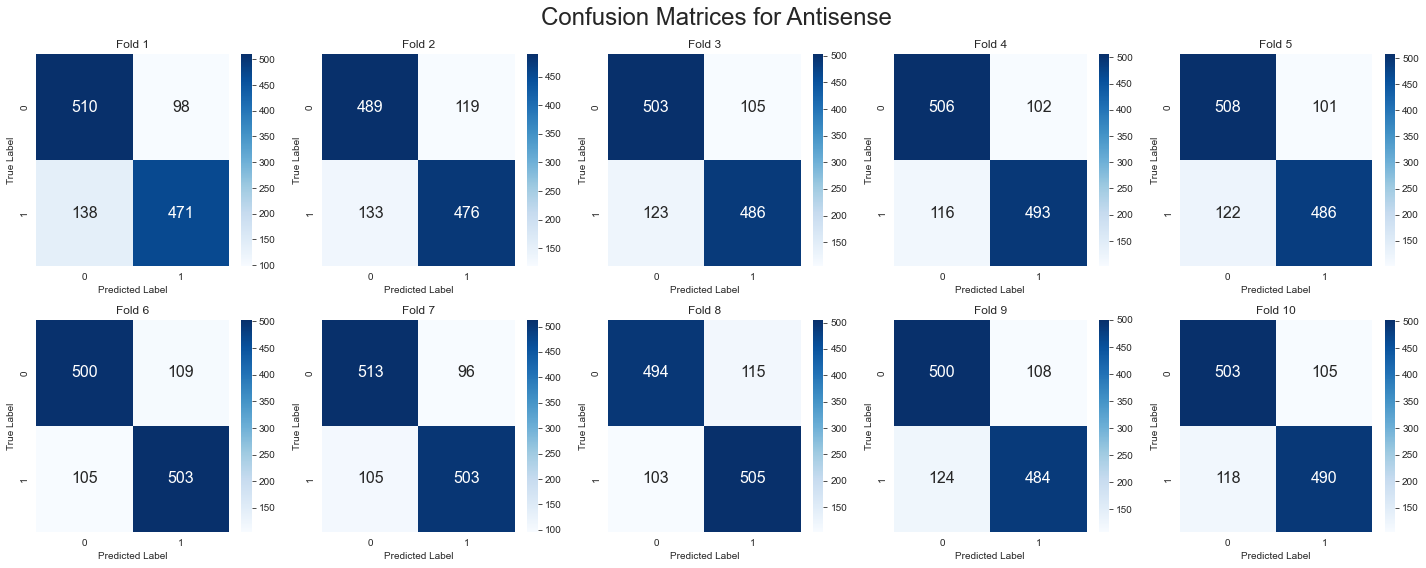

In [73]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Confusion Matrices for Antisense", fontsize=24)

for i, ax in enumerate(axs.flatten()):
    if i < len(antisense_cms):
        cm = antisense_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


## Internal Promoter with downstream

#### Bacteria Names
- Chlamydia pneumoniae
- Corynebacterium glutamicum
- E.coli
- Helicobactor pylori
- Klebsiella pneumoniae
- Mycobacterium tuberculosis
- Nostoc sp
- Pseudomonas aeruginosa
- Streptomyces coelicolor

In [74]:
internal= pd.read_csv(r"D:\Other promoters\Downstream sequences\Induced\Induced promoter vs downstream\Induced ussrey promoter vs downstream.csv")
internal

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-6.78,-9.81,-9.69,-10.51,-3.82,-10.51,-9.69,-8.26,-8.26,-9.81,...,-5.37,-6.78,-9.81,-5.37,-5.37,-5.37,-6.57,-9.81,-6.57,1
1,-6.57,-9.81,-6.57,-5.37,-5.37,-6.57,-5.37,-5.37,-3.82,-10.51,...,-6.57,-6.78,-14.59,-6.78,-5.37,-3.82,-6.57,-6.57,-14.59,1
2,-8.26,-8.26,-14.59,-8.26,-6.57,-6.57,-6.57,-14.59,-6.57,-6.78,...,-6.78,-14.59,-6.57,-5.37,-6.57,-5.37,-6.57,-14.59,-6.78,1
3,-10.51,-6.57,-5.37,-10.51,-6.78,-6.57,-9.81,-6.57,-5.37,-3.82,...,-5.37,-5.37,-10.51,-9.69,-9.81,-5.37,-5.37,-6.57,-9.81,1
4,-6.78,-9.81,-6.78,-5.37,-5.37,-3.82,-5.37,-5.37,-6.57,-9.81,...,-10.51,-6.57,-5.37,-6.78,-9.81,-5.37,-5.37,-5.37,-6.57,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12125,-8.26,-14.59,-8.26,-8.26,-6.57,-10.51,-9.69,-8.26,-14.59,-9.69,...,-6.57,-5.37,-10.51,-6.78,-9.81,-8.26,-8.26,-9.69,-8.26,0
12126,-8.26,-9.69,-9.81,-10.51,-9.69,-14.59,-6.57,-5.37,-6.78,-14.59,...,-8.26,-14.59,-9.69,-9.81,-5.37,-10.51,-8.26,-9.69,-14.59,0
12127,-5.37,-6.78,-9.81,-5.37,-6.78,-9.81,-10.51,-8.26,-9.69,-9.81,...,-6.57,-10.51,-9.69,-14.59,-8.26,-6.57,-10.51,-8.26,-6.57,0
12128,-14.59,-8.26,-9.69,-9.81,-5.37,-6.78,-9.81,-10.51,-8.26,-6.57,...,-14.59,-9.69,-8.26,-9.81,-6.57,-9.81,-9.69,-8.26,-14.59,0


In [76]:
internal_promoter= internal.drop(columns=['label'])
internal_label= internal['label']

In [77]:
# Convert DataFrame to numpy array
if isinstance(internal_promoter, pd.DataFrame):
    internal_promoter = internal_promoter.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

internal_accuracy = []
internal_precision=[]
internal_recall=[]
internal_f1_score=[]
internal_cms = []
internal_mcc = []
internal_specificity = []


# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(internal_promoter, internal_label)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = internal_promoter[test_index]
    y_test = internal_label[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    internal_accuracy.append(accuracy)
    internal_precision.append(precision)
    internal_recall.append(recall)
    internal_f1_score.append(f1)
    internal_mcc.append(mcc)
    internal_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
    internal_accuracy[-1], internal_precision[-1], internal_recall[-1], internal_f1_score[-1],
    internal_mcc[-1], internal_specificity[-1]))
    #fold_no += 1

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    internal_cms.append(cm)


Fold 1/10
 Accuracy: 0.8186314921681781, Precision: 0.8353552859618717, Recall: 0.7940691927512356, F1 Score: 0.8141891891891893, MCC: 0.6380585136079364, Specificity: 0.8273026315789473
Fold 2/10
 Accuracy: 0.807914262159934, Precision: 0.8327402135231317, Recall: 0.771004942339374, F1 Score: 0.8006843455945253, MCC: 0.6175537408685386, Specificity: 0.8432343234323433
Fold 3/10
 Accuracy: 0.8054410552349547, Precision: 0.8237347294938918, Recall: 0.7775947281713345, F1 Score: 0.7999999999999999, MCC: 0.6118619317379815, Specificity: 0.8448844884488449
Fold 4/10
 Accuracy: 0.8219291014014839, Precision: 0.8587155963302753, Recall: 0.771004942339374, F1 Score: 0.8125000000000001, MCC: 0.6472783581769582, Specificity: 0.8333333333333334
Fold 5/10
 Accuracy: 0.7955482275350371, Precision: 0.8132635253054101, Recall: 0.7677100494233937, F1 Score: 0.7898305084745763, MCC: 0.5920460183363171, Specificity: 0.8729372937293729
Fold 6/10
 Accuracy: 0.8268755152514426, Precision: 0.84494773519163

In [78]:
internal_accuracy

[0.8186314921681781,
 0.807914262159934,
 0.8054410552349547,
 0.8219291014014839,
 0.7955482275350371,
 0.8268755152514426,
 0.8252267106347898,
 0.8103874690849134,
 0.8268755152514426,
 0.8408903544929925]

In [79]:
internal_precision

[0.8353552859618717,
 0.8327402135231317,
 0.8237347294938918,
 0.8587155963302753,
 0.8132635253054101,
 0.8449477351916377,
 0.8444055944055944,
 0.8345195729537367,
 0.8666666666666667,
 0.8707360861759426]

In [80]:
internal_recall

[0.7940691927512356,
 0.771004942339374,
 0.7775947281713345,
 0.771004942339374,
 0.7677100494233937,
 0.8003300330033003,
 0.7970297029702971,
 0.7739273927392739,
 0.7722772277227723,
 0.8003300330033003]

In [81]:
internal_specificity

[0.8273026315789473,
 0.8432343234323433,
 0.8448844884488449,
 0.8333333333333334,
 0.8729372937293729,
 0.8234323432343235,
 0.8533772652388797,
 0.8533772652388797,
 0.8467874794069192,
 0.8813838550247117]

In [82]:
internal_f1_score

[0.8141891891891893,
 0.8006843455945253,
 0.7999999999999999,
 0.8125000000000001,
 0.7898305084745763,
 0.8220338983050848,
 0.8200339558573854,
 0.8030821917808219,
 0.8167539267015707,
 0.8340498710232158]

In [83]:
internal_mcc

[0.6380585136079364,
 0.6175537408685386,
 0.6118619317379815,
 0.6472783581769582,
 0.5920460183363171,
 0.6546476541389239,
 0.6514615885322658,
 0.6223922219545756,
 0.657625847644305,
 0.6839955590119932]

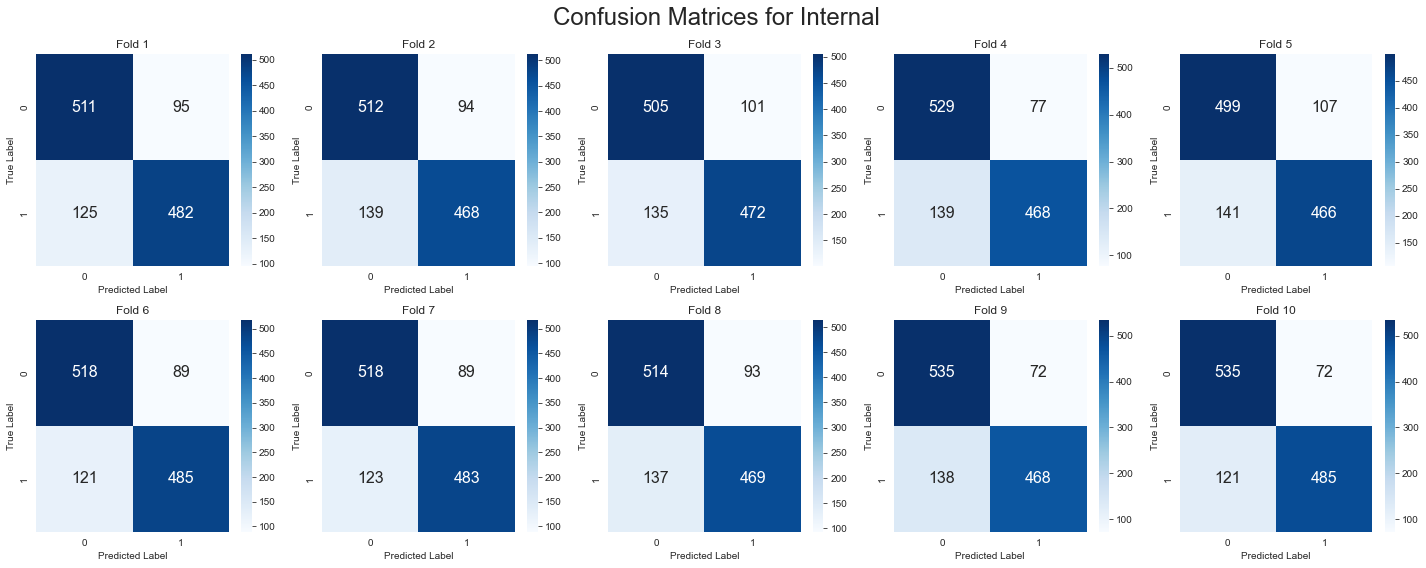

In [84]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Confusion Matrices for Internal", fontsize=24)

for i, ax in enumerate(axs.flatten()):
    if i < len(internal_cms):
        cm = internal_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()
